In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() Model_1_predictors = HomeData.drop(columns="HomeGoals")
Model_1_response = HomeData["HomeGoals"]

Model_1_predictors

### The final dataset

Note that as the above data has already been scraped and mined into final_data.csv, for the rest of this project we will use this csv file for our data. 

In [3]:
final_data = pd.read_csv("final_data.csv")
final_data.drop(labels="Unnamed: 0", axis="columns", inplace=True)
final_data

FileNotFoundError: [Errno 2] No such file or directory: 'final_data.csv'

# Problem formulation 1

### **Problem 1 and 2: Predicting goals scored and the feature importance of what predicts goals scored**

The most classic problem in football is to maximise the number of goals scored per match.

Thus, for this project, we start out with **two problems:**


1.  Predict the **number of goals scored** (response) based on the other relevant data available such as possession, shots, etc (predictors).
2. We hope to recommend to teams certain varibles that they can maximise in order to score more goals **(feature importance)**. 

For example, if we find that possession is the most important to predicting the number of goals scored, then we would recommend that teams play in a high-possession style of play.

So let's do some exploratory analysis on the data first!

# Exploratory Data Analysis



### The following are basic information regarding the columns  

In [5]:
final_data.info()

NameError: name 'final_data' is not defined

### So, what do these variables mean?

<h3>**Variable**</h3> | <h3>**Meaning**</h3>
--- | ---
<h4>Season, Referee, Date, Home/AwayTeam</h4> | <h4>Self-explanatory!</h4>
<h4>Fulltime, Halftime</h4> | <h4>Which team is winning at half or fulltime</h4>
<h4>Any of the below variable that starts with "Home"</h4> | <h4>Statistic pertains to the home team</h4>
<h4>Any of the below variable that starts with "Away"</h4> | <h4>Statistic pertains to away team</h4>
<h4>Possession</h4> | <h4>The percentage of time in the game the ball was held by a team</h4>
<h4>Touches</h4> | <h4>Number of times a team touched the ball</h4>
<h4>Passes, RedCards, YellowCards, Fouls, Goals, Corners</h4> | <h4>Self-explanatory!</h4>
<h4>Tackles</h4> | <h4>Number of times a defender "tackles" the ball off the attacker</h4>
<h4>Clearances</h4> | <h4>Number of times a team shot the ball hard to get it away from their goal</h4>
<h4>Offsides</h4> | <h4>Number of times a pass was played to a man who was behind the opposing defensive line </h4>
<h4>GoalsHalftime</h4> | <h4>Number of goals scored before halftime</h4>
<h4>Shots</h4> | <h4>Number of times the ball was hit hard with the intention of scoring a goal</h4>
<h4>ShotsOnTarget</h4> | <h4>Number of times a shot is aimed correctly i.e. would be a goal if not stopped by a defender or goalkeeper</h4>











## Cleaning the data for the most relevant variables for the data

Notice how there are a lot of data above that is not relevant to predicting number of goals scored. 

This data includes game meta-data such as referee name and date of the match, and also the information such as the corners, cards and fouls which are considered *incidental* (meaning, the teams playing the match are not actively incorporating maximising/minimising these variables into their playstyles. Every team wants to minimise cards and maximise corners, because they are clealy optimal)

A data-driven recommendation to maximise/minimise any of these variables would not make sense (e.g., play the game with certain referees, or make sure we minimise red cards) 

Thus, let's only include the data that is a playstyle choice for a team, and is relevant to controlling the number of goals in a match

Let's also limit our analysis to the **home team** for easier exploration of the data by eye, and see what we discover

In [8]:
#Extracting variables that could affect home goals
HomeData = pd.DataFrame(final_data[["HomePossession", "HomeTouches", "HomePasses", "HomeTackles", "HomeClearances", "HomeOffsides", "HomeShots", "HomeShotsOnTarget", "HomeGoals"]])
HomeData

NameError: name 'final_data' is not defined

In [9]:
HomeData.describe()

NameError: name 'HomeData' is not defined

Interestingly, it seems that all our chosen variables are actually **numeric**. Goals may be classified as numeric or categorical - we will specify whether it's one or the other in our analysis below.

As our data is made up of univariate columns, lets use a box plot of all variables to have a quick look  

In [10]:
#Box plot of all the variables
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = HomeData, orient = "h")


NameError: name 'HomeData' is not defined

<Figure size 1296x432 with 0 Axes>

We can see that the median of HomeTouches and HomePasses are much greater than that of the other variables. Let's drop this in the plot below

If we were to zoom in to the other variables, we see that the median of each of these variables are far apart from each other. 

In [11]:
#Dropping HomeTouches and HomePasses
HomeData_new = HomeData.drop(columns = ['HomeTouches', 'HomePasses'])
f = plt.figure(figsize=(18, 6))
sb.boxplot(data = HomeData_new, orient = "h")


NameError: name 'HomeData' is not defined

### Some clues to solving our problem

Finally, let's get some clues on how to solve our problem. First, we start with a correlation heatmap to see which variables are the most correlated with HomeGoals:

NameError: name 'HomeData' is not defined

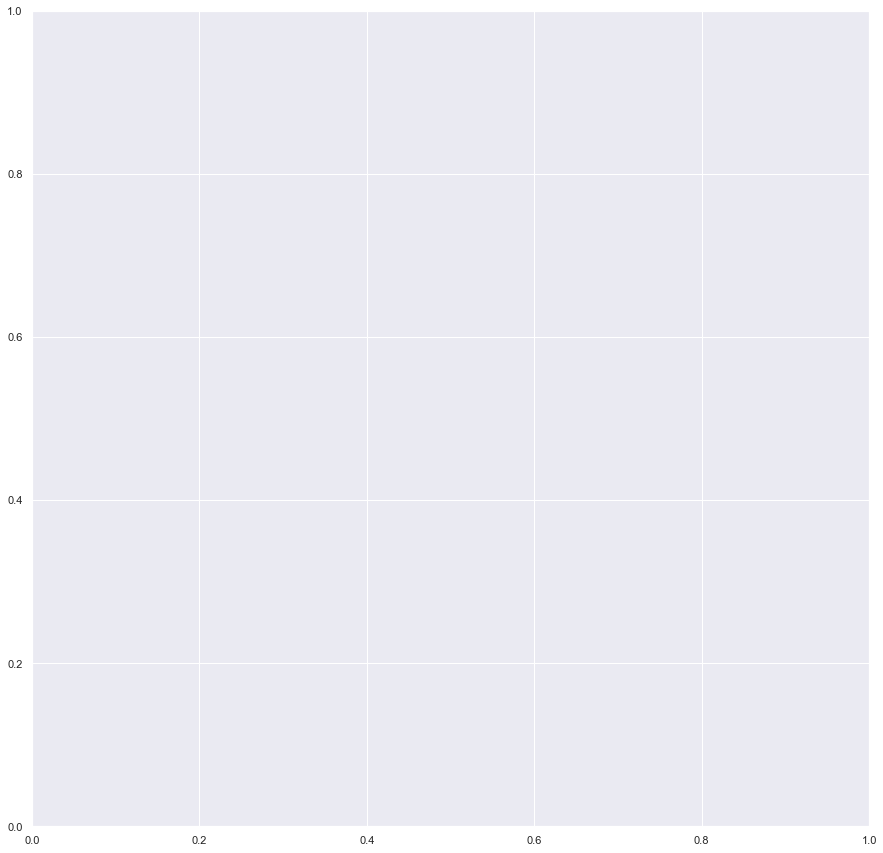

In [12]:
f, axes = plt.subplots(1, 1, figsize = (15,15))
sb.heatmap(HomeData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

As one can see from the above heatmap, it appears that for HomeGoals, the HomeShots and HomeShotsOnTarget statistics are the most correlated - with 0.28 and 0.44 for the r<sup>2</sup> values respectively. 

It would make sense that, if you take more shots, you should score more goals. But is this really true? How much do shots matter over everything else? Let's use a couple of box plots to visualise this

In [13]:
HomeGoals = final_data['HomeGoals']
HomeShots = final_data['HomeShots']
jointDF = pd.concat([HomeShots, HomeGoals], axis = 1)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "HomeShots", y = "HomeGoals", data = jointDF, orient = "h")
jointDF.corr() 

NameError: name 'final_data' is not defined

We can clearly see that as the number of HomeShots increase, the number of HomeGoals also increase. This is in accordance with the correlation observed above.

In [14]:
HomeShotsOnTarget = final_data['HomeShotsOnTarget']
jointDF2 = pd.concat([HomeShotsOnTarget, HomeGoals], axis = 1)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "HomeShotsOnTarget", y = "HomeGoals", data = jointDF2, orient = "h")
jointDF2.corr()

NameError: name 'final_data' is not defined

Similarly, as HomeShotsOnTarget increases, based on the median of HomeGoals, then number of HomeGoals also increases

In [15]:
HomePossession = final_data['HomePossession']
jointDF3 = pd.concat([HomePossession, HomeGoals], axis = 1)
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "HomePossession", y = "HomeGoals", data = jointDF3, orient = "h")
jointDF3.corr()

NameError: name 'final_data' is not defined

In this case, the medians of each level of HomeGoals are about the same. Therefore there appears to be no correlation between HomePossession and HomeGoals.

Notice that the above are all numeric variables, so we can actually use a simple linear regression model in order to predict home goals. 

So let's try that then!